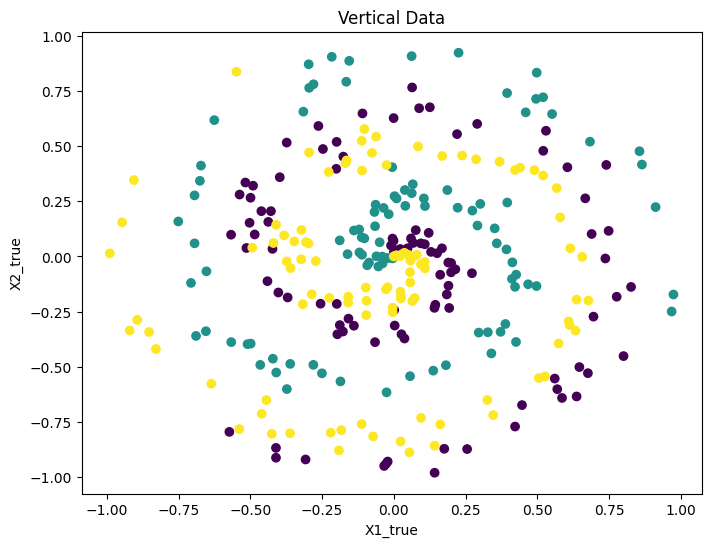

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.10 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases
        self.inputs = inputs
    def backward(self, dvalues):
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
        self.dinputs = np.dot(dvalues, self.weights.T)


class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)
        self.inputs = inputs
    def backward(self, dvalues):
        self.dinputs = dvalues.copy()
        self.dinputs[self.inputs <= 0 ] = 0

class Activation_Softmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities
    def backward(self, dvalues):
        self.dinputs = np.empty_like(dvalues)
        for index, (single_output, single_dvalues) in enumerate(zip(self.output, dvalues)):
            single_output = single_output.reshape(-1, 1)
            jacobian_matrix = np.diagflat(single_output) - np.dot(single_output, single_output.T)
            self.dinputs[index] = np.dot(jacobian_matrix, single_dvalues)


class Loss:
    def calculate(self, output, y):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        return data_loss
    
class Loss_MeanSquaredError(Loss):
    def forward(self, y_pred, y_true):
        samples = len(y_pred)
        squared_error = np.square(np.subtract(y_pred,y_true))
        return squared_error

    def backward(self, y_pred, y_true):
        samples = len(y_true)
        outputs = y_pred.shape[-1]
        self.dinputs = -2 * (y_true - y_pred) / outputs
        self.dinputs = self.dinputs / samples

class Loss_CategoricalCrossentropy(Loss):
    def forward(self, y_pred, y_true):
        samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples), y_true]
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped*y_true, axis=1)

        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods
    
    def backward(self, dvalues, y_true):
        samples = len(dvalues)
        labels = len(dvalues[0])
        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true]
        self.dinputs = -y_true / dvalues
        self.dinputs = self.dinputs / samples

class Activation_Softmax_Loss_CategoricalCrossentropy():
    def __init__(self):
        self.activation = Activation_Softmax()
        self.loss = Loss_CategoricalCrossentropy()

    def forward(self, inputs, y_true):
        self.activation.forward(inputs)
        self.output = self.activation.output
        return self.loss.calculate(self.output, y_true)

    def backward(self, dvalues, y_true):
        samples = len(dvalues)
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)
        self.dinputs = dvalues.copy()
        self.dinputs[range(samples), y_true] -= 1
        self.dinputs = self.dinputs / samples
    
class Accuracy:
    def calculate(self, output, y):
        predictions = np.argmax(output, axis=1)
        if len(y.shape) == 2:
            y = np.argmax(y, axis=1)
        accuracy = np.mean(predictions == y)
        return accuracy



New set of weights found, iteration: 1 loss: 1.0983935062514993
New set of weights found, iteration: 101 loss: 1.096866206566205
New set of weights found, iteration: 201 loss: 1.0956061642252666
New set of weights found, iteration: 301 loss: 1.0938921207976189
New set of weights found, iteration: 401 loss: 1.091360900290862
New set of weights found, iteration: 501 loss: 1.0873997775349327
New set of weights found, iteration: 601 loss: 1.0816905490194657
New set of weights found, iteration: 701 loss: 1.0749781700261405
New set of weights found, iteration: 801 loss: 1.0692381563942814
New set of weights found, iteration: 901 loss: 1.0651290797963593
New set of weights found, iteration: 1001 loss: 1.0623037486781728
New set of weights found, iteration: 1101 loss: 1.0603217598833685
New set of weights found, iteration: 1201 loss: 1.0588131058503545
New set of weights found, iteration: 1301 loss: 1.057590281291528
New set of weights found, iteration: 1401 loss: 1.0566108320319407
New set of

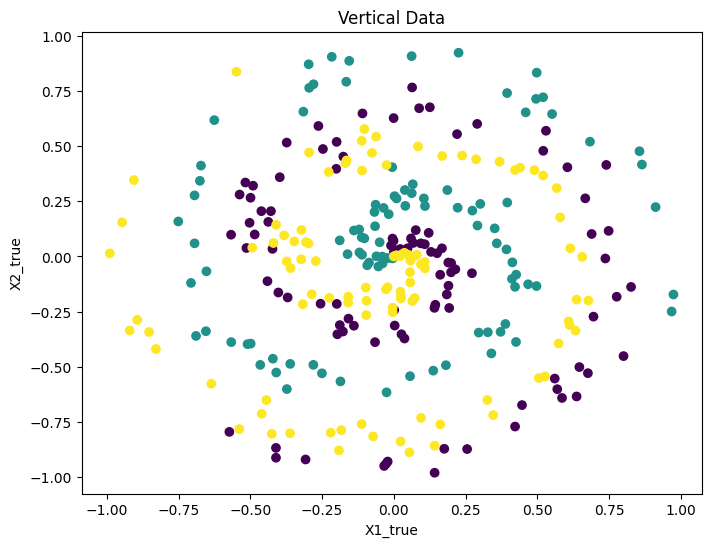

C:\Users\abdallah\AppData\Local\Temp\ipykernel_12196\739034632.py:68: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[: , 0], X[:, 1], c=predictions, cmap='viridis')


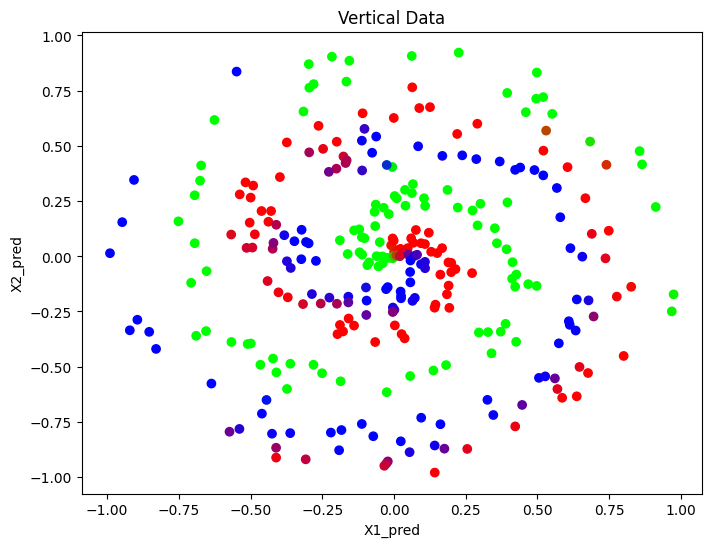

In [19]:
dense1 = Layer_Dense(2,32)
activation1_ReLU = Activation_ReLU()
dense2 = Layer_Dense(32,64)
activation2_ReLU = Activation_ReLU()
dense3 = Layer_Dense(64,32)
activation3_ReLU = Activation_ReLU()
dense4 = Layer_Dense(32,3)
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()
accuracy_function = Accuracy()

learning_rate = 0.1


for epoch in range(10000):

    dense1.forward(X)
    activation1_ReLU.forward(dense1.output)
    dense2.forward(activation1_ReLU.output)
    activation2_ReLU.forward(dense2.output)
    dense3.forward(activation2_ReLU.output)
    activation3_ReLU.forward(dense3.output)
    dense4.forward(activation3_ReLU.output)
    loss_activation.forward(dense4.output, y)


    
    predictions = loss_activation.output

    loss = loss_activation.loss.calculate(predictions, y)



    loss_activation.backward(predictions, y)
    dense4.backward(loss_activation.dinputs)
    activation3_ReLU.backward(dense4.dinputs)
    dense3.backward(activation3_ReLU.dinputs)
    activation2_ReLU.backward(dense3.dinputs)
    dense2.backward(activation2_ReLU.dinputs)
    activation1_ReLU.backward(dense2.dinputs)
    dense1.backward(activation1_ReLU.dinputs)


    dense1.weights -= learning_rate * dense1.dweights
    dense1.biases -= learning_rate * dense1.dbiases
    dense2.weights -= learning_rate * dense2.dweights
    dense2.biases -= learning_rate * dense2.dbiases
    dense3.weights -= learning_rate * dense3.dweights
    dense3.biases -= learning_rate * dense3.dbiases
    dense4.weights -= learning_rate * dense4.dweights
    dense4.biases -= learning_rate * dense4.dbiases

    
    if epoch%100 == 1:
        print('New set of weights found, iteration:', epoch, 'loss:', loss)





plt.figure(figsize=(8, 6))
plt.scatter(X[: , 0], X[:, 1], c=y, cmap='viridis')
plt.title('Vertical Data')
plt.xlabel('X1_true')
plt.ylabel('X2_true')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(X[: , 0], X[:, 1], c=predictions, cmap='viridis')
plt.title('Vertical Data')
plt.xlabel('X1_pred')
plt.ylabel('X2_pred')
plt.show()   
